**Property Price Prediction (House Price Estimation)**

**1. Problem Statement**

Property prices are influenced by multiple factors such as house size, location, age, and overall condition. Accurately estimating property prices is important for buyers, sellers. real estate companies, and financial institutions. Manual estimation often leads to incorrect pricing and poor decision-making.

The objective of this project is to build a regression-based machine learning model to predict property prices using historical housing data and to identify the most important factors influencing house prices.

***2.Objectives of the Project***


* Understand property price patterns
* Perform basic data preprocessing
* Conduct minimal but meaningful Exploratory Data Analysis (EDA)
* Build regression-based machine learning models
* Evaluate model performance using regression metrics
* Identify key price-influencing features

***3.Dataset Description***

In [115]:

from google.colab import files
uploaded=files.upload()

Saving train.csv to train (8).csv


In [116]:
import pandas as pd
df=pd.read_csv("train.csv")
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [117]:
df.shape

(1460, 81)

In [118]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1455,False
1456,False
1457,False
1458,False


In [119]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


***4.Explotary Data Analysis(EDA)***

**Graph 1: Price Distribution**

In [120]:
import matplotlib.pyplot as plt


TypeError: 'str' object is not callable

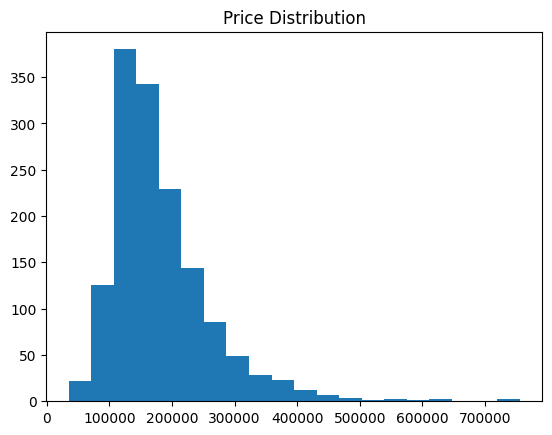

In [121]:
plt.hist(df["SalePrice"], bins=20)
plt.title("Price Distribution")
plt.xlabel("Property Price")
plt.ylabel("Frequency")
plt.show()

TypeError: 'str' object is not callable

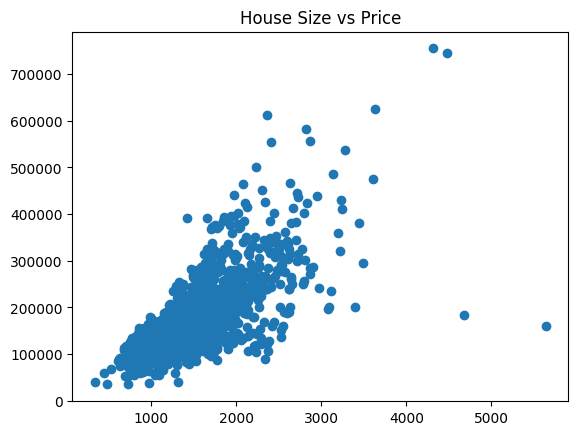

In [124]:
plt.scatter(df["GrLivArea"], df["SalePrice"])
plt.title("House Size vs Price")
plt.xlabel("Size")
plt.ylabel("Price")
plt.show()

**Graph 2**

TypeError: 'str' object is not callable

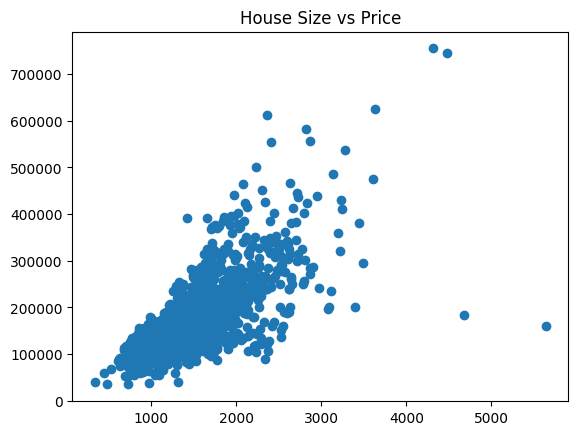

In [123]:
plt.scatter(df["GrLivArea"], df["SalePrice"])
plt.title("House Size vs Price")
plt.xlabel("Size")
plt.ylabel("Price")
plt.show()

**Graph 3**

TypeError: 'str' object is not callable

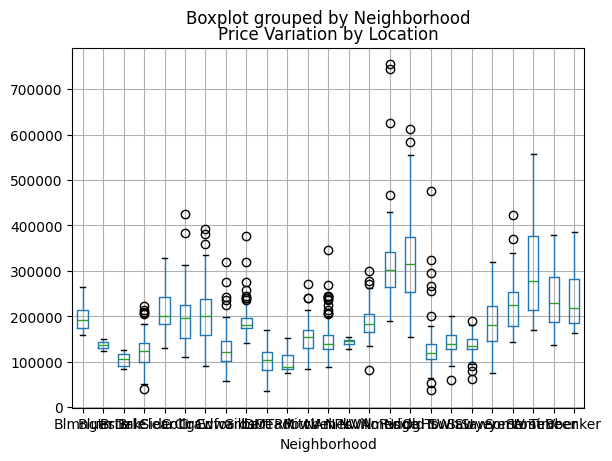

In [125]:
df.boxplot(column="SalePrice", by="Neighborhood")
plt.title("Price Variation by Location")
plt.xlabel("Location")
plt.ylabel("Price")
plt.suptitle("")  # removes extra title
plt.show()

**Graph 4**

TypeError: 'str' object is not callable

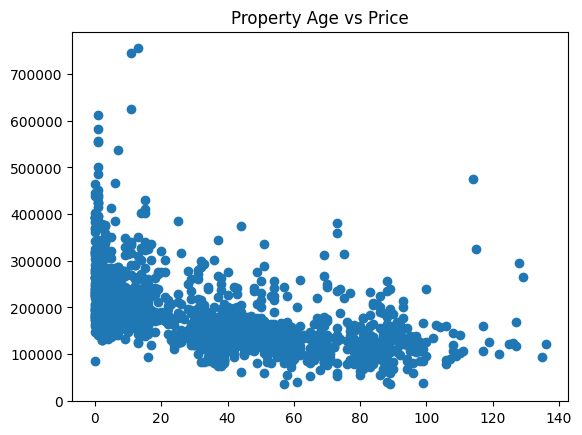

In [126]:
df['PropertyAge'] = df['YrSold'] - df['YearBuilt']
plt.figure()
plt.scatter(df['PropertyAge'], df['SalePrice'])
plt.title("Property Age vs Price")
plt.xlabel("Property Age")
plt.ylabel("Sale Price")
plt.show()

***5. Machine Learning Workflow***

In [127]:

#Handling Numerical column
num_cols=['LotFrontage']
df[num_cols]=df[num_cols].fillna(df[num_cols].median())
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC  Fence MiscF

In [128]:

#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [129]:
df['Condition2']=le.fit_transform(df['Condition2'])
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC  Fence MiscF

In [130]:

#one-hot Encoding
df=pd.get_dummies(
    df,
    columns=['Neighborhood','Condition1'],
    drop_first=True
)
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... Neighborhood_Timber

In [131]:

X=df[['LotFrontage','LotArea','OverallCond']]
y=df['SalePrice']

In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)


***6.Models Used***

**Linear Regression**

In [133]:
from sklearn.linear_model import LinearRegression

In [134]:
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [135]:
predicated_price=model.predict(X_test)
print("Predicated Price:",predicated_price[0])

Predicated Price: 167310.6126061822


**Decision Tree**

In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [137]:

model=DecisionTreeClassifier(criterion='gini',max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [138]:
y_pred=model.predict(X)
print("Prediction:",y_pred)

Prediction: [140000 135000 190000 ... 135000 135000 135000]


In [139]:
accuracy=accuracy_score(y,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.023972602739726026


**Random Forest**

In [140]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [141]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [142]:
rf=RandomForestClassifier(
    n_estimators=100,
    bootstrap=True,
    random_state=42
)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [143]:
y_pred=rf.predict(X)
print("Prediction:",y_pred)

Prediction: [179000 140000 223500 ... 266500 142125 147500]


In [144]:
accuracy=accuracy_score(y,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.7253424657534246


***7.Model Evolution***

In [145]:

from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

In [146]:
#RMSE
rmse=np.sqrt(mean_squared_error(y,y_pred))
print("RMSE:",rmse)

RMSE: 41089.11761177628


In [147]:
#R2 Score
r2=r2_score(y,y_pred)
print("R2_score:",r2)

R2_score: 0.7323018580270236


In [148]:
#Identifing Price Influencing-Factors
importances  = rf.feature_importances_
features = X.columns

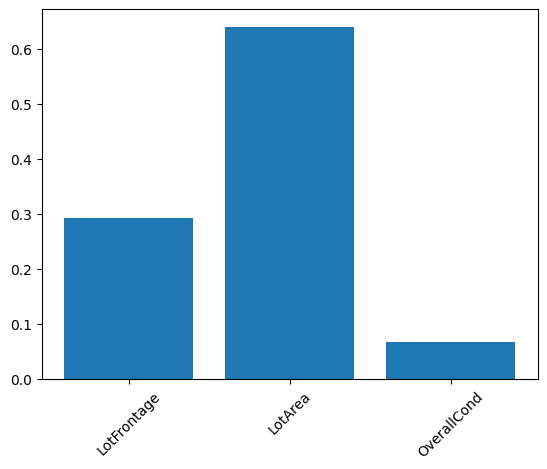

In [149]:
import matplotlib.pyplot as plt
plt.figure()
plt.bar(features,importances)
plt.xlabel=("Features Importance-Random Forest")
plt.ylabel=("Importances Score")
plt.xticks(rotation=45)
plt.show()